In [3]:

!pip install -U ultralytics==8.2.0
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install python-Levenshtein ctcdecode jamspell


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 14.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.119
    Uninstalling ultralytics-8.3.119:
      Successfully uninstalled ultralytics-8.3.119
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.1 MB/s eta 0:00:00a 0:00:01
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates fro

In [4]:
!pip install ultralytics


In [3]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [11]:


from ultralytics import YOLO
from huggingface_hub import hf_hub_download
from matplotlib import pyplot as plt

# Load the weights from our repository
model_path = hf_hub_download(local_dir=".",
                             repo_id="armvectores/yolov8n_handwritten_text_detection",
                             filename="best.pt")
model = YOLO(model_path)

# Load test blank
test_blank_path = '/kaggle/input/avavav/Screenshot from 2025-04-28 17-57-41.png'

# Do the predictions



image 1/1 /kaggle/input/avavav/Screenshot from 2025-04-28 17-57-41.png: 416x640 2 words, 34.0ms
Speed: 1.8ms preprocess, 34.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 640)
Results saved to detected


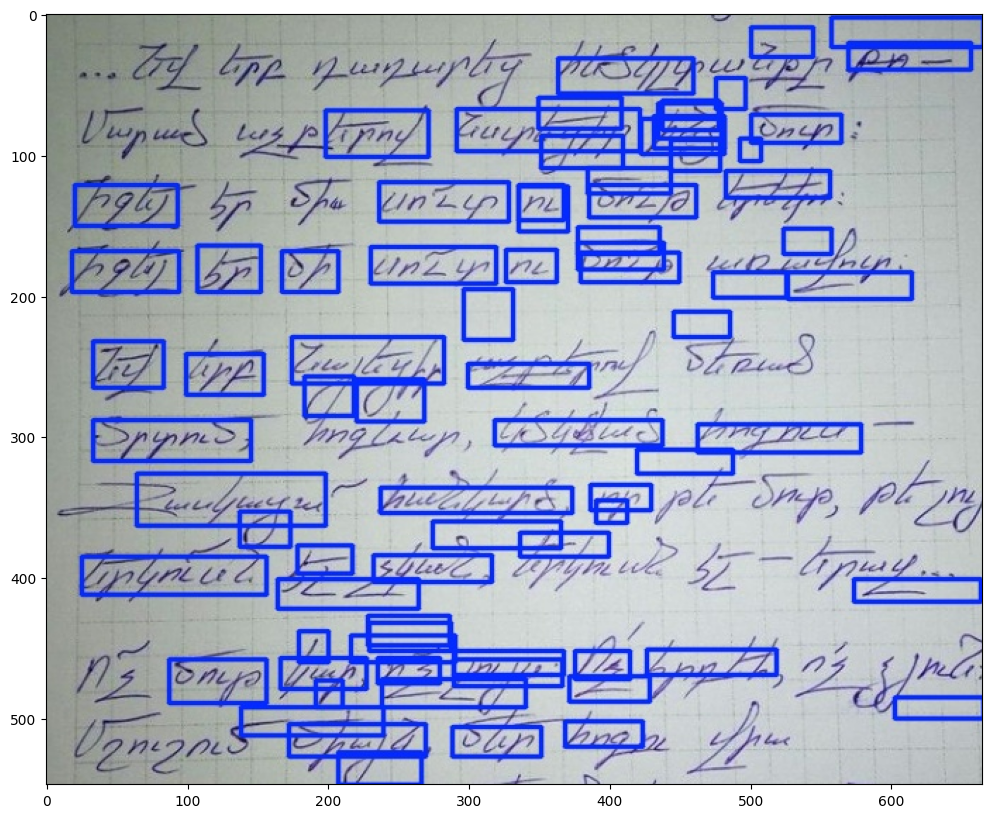

In [14]:
res = model.predict(source=test_blank_path, project='.',name='detected', exist_ok=True, save=True, show=False, show_labels=False, show_conf=False, conf=0.5, )

plt.figure(figsize=(15,10))
plt.imshow(plt.imread('/kaggle/working/detected/Screenshot from 2025-04-28 17-45-21.jpg'))
plt.show()


In [17]:

SRC_ROOT = '/kaggle/input/russian'             # где лежит исходный датасет
DST_ROOT = '/kaggle/working/russian_split'     # куда копируем и сплитим
VAL_RATIO = 0.20                               # доля валидации


import os, shutil, random, pathlib

def makedirs(p):
    os.makedirs(p, exist_ok=True)

# ---------- Шаг 1. копируем весь датасет в working ----------
if not os.path.exists(DST_ROOT):
    print('Копируем датасет…')
    shutil.copytree(SRC_ROOT, DST_ROOT)
else:
    print('Датасет уже скопирован.')

# ---------- Шаг 2. создаём папки train / val ----------
for split in ['train', 'val']:
    makedirs(f'{DST_ROOT}/images/{split}')
    makedirs(f'{DST_ROOT}/labels/{split}')

# ---------- Шаг 3. собираем список изображений ----------
img_exts = ('.jpg', '.jpeg', '.png')
all_imgs = [p for p in pathlib.Path(f'{DST_ROOT}/images').glob('*') if p.suffix.lower() in img_exts]

random.shuffle(all_imgs)
val_count = int(len(all_imgs) * VAL_RATIO)
val_imgs  = set(all_imgs[:val_count])

def move_pair(img_path, split):
    lbl_path = pathlib.Path(str(img_path).replace('/images/', '/labels/')).with_suffix('.txt')
    dst_img = pathlib.Path(f'{DST_ROOT}/images/{split}/{img_path.name}')
    dst_lbl = pathlib.Path(f'{DST_ROOT}/labels/{split}/{lbl_path.name}')
    shutil.move(img_path, dst_img)
    if lbl_path.exists():
        shutil.move(lbl_path, dst_lbl)

# ---------- Шаг 4. переносим файлы ----------
for img in all_imgs:
    split = 'val' if img in val_imgs else 'train'
    move_pair(img, split)

print(f'Готово! Train: {len(all_imgs)-val_count},  Val: {val_count}')
print(f'Структура: {DST_ROOT}')


Копируем датасет…
Готово! Train: 0,  Val: 0
Структура: /kaggle/working/russian_split


In [19]:
from ultralytics import YOLO


model = YOLO('best.pt')


model.train(
    data='/kaggle/working/russian_split/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    patience=0,
    lr0=0.001,
    optimizer='Adam',
    project='yolo_russian_text',
    name='exp',
    pretrained=True
)


Ultralytics 8.3.119 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=best.pt, data=/kaggle/working/russian_split/data.yaml, epochs=50, time=None, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=yolo_russian_text, name=exp3, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

train: Scanning /kaggle/working/russian_split/train/labels.cache... 2478 images, 9 backgrounds, 0 corrupt: 100%|██████████| 2478/2478 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 663.9±84.3 MB/s, size: 260.5 KB)


val: Scanning /kaggle/working/russian_split/valid/labels.cache... 17 images, 1 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<?, ?it/s]


Plotting labels to yolo_russian_text/exp3/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to yolo_russian_text/exp3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.48G      1.776      1.086      1.366       1104        640: 100%|██████████| 155/155 [00:37<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all         17        853      0.859      0.802      0.867      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.48G       1.53     0.9245      1.229       1406        640: 100%|██████████| 155/155 [00:34<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         17        853      0.895      0.842      0.905      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.25G      1.442     0.8527      1.173       1650        640: 100%|██████████| 155/155 [00:34<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         17        853      0.905      0.836      0.916      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.25G        1.4     0.8267      1.149       1124        640: 100%|██████████| 155/155 [00:35<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         17        853      0.921      0.866      0.926      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.25G       1.37     0.8015      1.133       1167        640: 100%|██████████| 155/155 [00:34<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]

                   all         17        853      0.902      0.873      0.929      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.25G      1.343     0.7802       1.12       1241        640: 100%|██████████| 155/155 [00:34<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         17        853      0.911      0.875      0.933      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.25G      1.316     0.7585      1.103       1389        640: 100%|██████████| 155/155 [00:35<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


                   all         17        853      0.886      0.887      0.933      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.25G      1.307     0.7492      1.098       1259        640: 100%|██████████| 155/155 [00:34<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         17        853      0.894      0.877      0.935      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.25G      1.299      0.746      1.098       1175        640: 100%|██████████| 155/155 [00:35<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         17        853      0.914      0.869       0.93      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.25G      1.279     0.7323      1.087       1515        640: 100%|██████████| 155/155 [00:34<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         17        853      0.899      0.891      0.935      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.25G      1.267     0.7238      1.082       1387        640: 100%|██████████| 155/155 [00:34<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         17        853      0.918      0.869      0.936      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.25G      1.265     0.7227      1.081       1233        640: 100%|██████████| 155/155 [00:34<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


                   all         17        853      0.888      0.892      0.936      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.07G      1.253     0.7103      1.076       1003        640: 100%|██████████| 155/155 [00:34<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all         17        853      0.909      0.899      0.948      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.82G      1.239     0.7007      1.069       1520        640: 100%|██████████| 155/155 [00:34<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         17        853      0.912      0.898      0.947      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.26G      1.229     0.6959      1.063       1016        640: 100%|██████████| 155/155 [00:34<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all         17        853      0.877      0.905      0.944      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.26G      1.226     0.6874      1.061       1417        640: 100%|██████████| 155/155 [00:34<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         17        853      0.917      0.906      0.955      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.26G      1.209     0.6828      1.057       1442        640: 100%|██████████| 155/155 [00:35<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         17        853      0.917      0.903      0.951      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.26G      1.206     0.6774      1.056       1505        640: 100%|██████████| 155/155 [00:34<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         17        853      0.898      0.905      0.947      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.26G      1.201     0.6735      1.051       1219        640: 100%|██████████| 155/155 [00:34<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         17        853      0.881      0.905      0.951      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.26G      1.196     0.6669      1.048       1311        640: 100%|██████████| 155/155 [00:34<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         17        853      0.914      0.873      0.948      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.26G       1.19     0.6668      1.046       1358        640: 100%|██████████| 155/155 [00:34<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         17        853      0.917      0.885       0.95      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.26G      1.181     0.6595      1.043       1485        640: 100%|██████████| 155/155 [00:34<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         17        853      0.927      0.902      0.953      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.01G      1.181     0.6557      1.041       1320        640: 100%|██████████| 155/155 [00:35<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         17        853      0.914       0.91      0.952      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       4.8G      1.175     0.6565      1.042        973        640: 100%|██████████| 155/155 [00:36<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         17        853      0.903      0.902      0.952      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       4.8G      1.172     0.6508      1.039       1388        640: 100%|██████████| 155/155 [00:36<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         17        853      0.913      0.911      0.954      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       4.8G      1.164     0.6441      1.035       1153        640: 100%|██████████| 155/155 [00:35<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all         17        853       0.92       0.92      0.958      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       4.8G      1.163     0.6482      1.036       1249        640: 100%|██████████| 155/155 [00:36<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         17        853      0.922      0.909      0.961      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.68G      1.158     0.6413      1.034       1179        640: 100%|██████████| 155/155 [00:35<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         17        853      0.909      0.924      0.957       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.68G      1.155     0.6385      1.032       1225        640: 100%|██████████| 155/155 [00:34<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         17        853      0.919      0.914      0.954      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.58G      1.155     0.6359       1.03       1102        640: 100%|██████████| 155/155 [00:35<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         17        853      0.904      0.914      0.957      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.58G      1.144     0.6341      1.028       1291        640: 100%|██████████| 155/155 [00:36<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         17        853      0.906      0.911      0.945       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.58G      1.144     0.6319      1.027        940        640: 100%|██████████| 155/155 [00:36<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         17        853      0.915       0.92      0.961      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.58G      1.136     0.6281      1.024       1503        640: 100%|██████████| 155/155 [00:35<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         17        853       0.92      0.907      0.955      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.58G      1.133     0.6238      1.022       1217        640: 100%|██████████| 155/155 [00:34<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]

                   all         17        853      0.913      0.914      0.956      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.58G      1.124     0.6212       1.02       1081        640: 100%|██████████| 155/155 [00:35<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         17        853      0.923       0.91      0.959      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.58G      1.125     0.6206       1.02       1261        640: 100%|██████████| 155/155 [00:35<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         17        853      0.921      0.907      0.952      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.58G      1.125     0.6198      1.021       1300        640: 100%|██████████| 155/155 [00:35<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         17        853      0.925      0.907      0.956      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.58G      1.122     0.6176      1.019       1293        640: 100%|██████████| 155/155 [00:35<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]

                   all         17        853      0.898      0.914      0.955      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.58G      1.121     0.6169      1.019       1024        640: 100%|██████████| 155/155 [00:34<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         17        853      0.921       0.91      0.956      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.58G       1.11     0.6137      1.016       1515        640: 100%|██████████| 155/155 [00:35<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         17        853      0.914      0.903       0.95      0.684


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.58G      1.059     0.5773      1.004        725        640: 100%|██████████| 155/155 [00:34<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]


                   all         17        853      0.912      0.916       0.96      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.58G      1.049     0.5702     0.9988        698        640: 100%|██████████| 155/155 [00:32<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

                   all         17        853      0.906      0.913      0.957      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.58G      1.041     0.5626     0.9954        842        640: 100%|██████████| 155/155 [00:32<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         17        853      0.906      0.914       0.96      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.58G      1.038     0.5591     0.9935        601        640: 100%|██████████| 155/155 [00:32<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         17        853      0.921      0.912      0.959      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.58G      1.035     0.5583     0.9936        882        640: 100%|██████████| 155/155 [00:33<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         17        853      0.911       0.92      0.959      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.58G      1.032     0.5575     0.9929        828        640: 100%|██████████| 155/155 [00:33<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         17        853      0.913      0.912      0.959      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.58G      1.027     0.5523      0.988        709        640: 100%|██████████| 155/155 [00:32<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]


                   all         17        853      0.915      0.911       0.96       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.58G      1.023       0.55     0.9891        995        640: 100%|██████████| 155/155 [00:33<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


                   all         17        853      0.926      0.911       0.96      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.58G      1.022     0.5486     0.9879        720        640: 100%|██████████| 155/155 [00:33<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         17        853      0.915      0.915      0.957      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.58G      1.022     0.5498     0.9893        703        640: 100%|██████████| 155/155 [00:32<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]

                   all         17        853      0.917      0.924      0.959       0.69



50 epochs completed in 0.491 hours.
Optimizer stripped from yolo_russian_text/exp3/weights/last.pt, 6.2MB
Optimizer stripped from yolo_russian_text/exp3/weights/best.pt, 6.2MB

Validating yolo_russian_text/exp3/weights/best.pt...
Ultralytics 8.3.119 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]


                   all         17        853      0.916      0.924      0.959       0.69


invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to yolo_russian_text/exp3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ddb50ea1e10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [21]:
import shutil, pathlib
src = pathlib.Path('yolo_russian_text/exp/weights/best.pt')
dst = pathlib.Path('/kaggle/working/yolov8_ru_handtext.pt')
shutil.copy(src, dst)

PosixPath('/kaggle/working/yolov8_ru_handtext.pt')

In [ ]:
kaggle datasets create -p yolo_ru_weights -u

In [24]:
test_blank_path = '/kaggle/input/russian/test/images/109_4_JPG.rf.a3ed05c4acb87accc0947f81f09c351a.jpg'

In [25]:
res = model.predict(source=test_blank_path, project='.',name='detected', exist_ok=True, save=True, show=False, show_labels=False, show_conf=False, conf=0.5, )


image 1/1 /kaggle/input/russian/test/images/109_4_JPG.rf.a3ed05c4acb87accc0947f81f09c351a.jpg: 640x640 96 BASEs, 7.4ms
Speed: 3.5ms preprocess, 7.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to detected


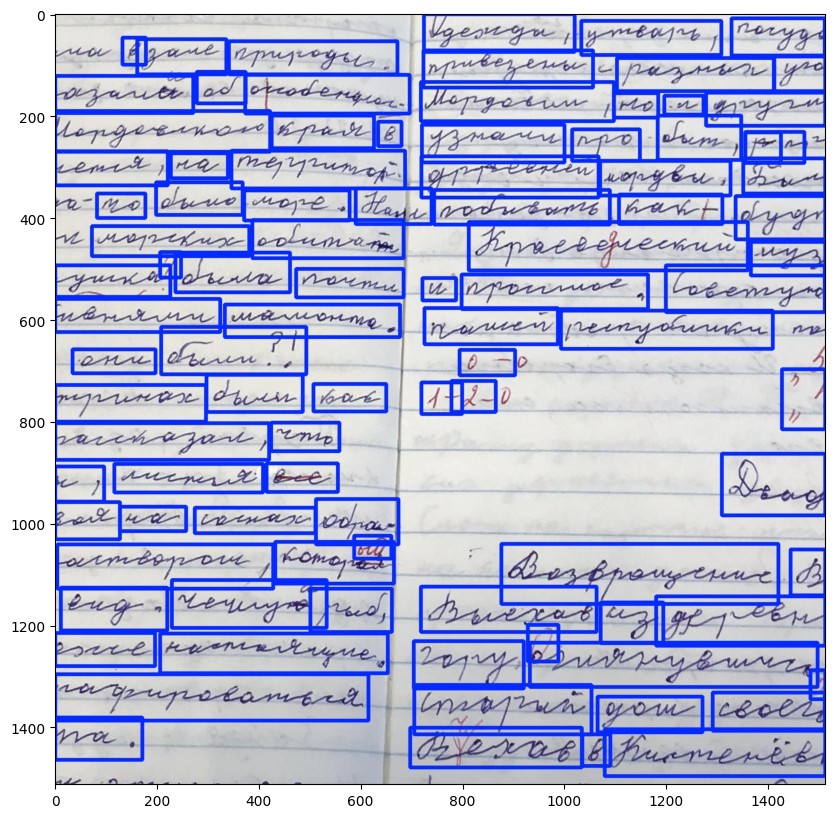

In [26]:


plt.figure(figsize=(15,10))
plt.imshow(plt.imread('/kaggle/working/detected/109_4_JPG.rf.a3ed05c4acb87accc0947f81f09c351a.jpg'))
plt.show()

In [ ]:
res = model.predict(source=test_blank_path, project='.',name='detected', exist_ok=True, save=True, show=False, show_labels=False, show_conf=False, conf=0.5, )